# PRUEBAS

### This test consist on show accuracy predicting values with KNN on a DB with 40 variables with empty data ( check ZB.UVigoEntero) 

#### To check this accuracy, Is used a Known data erased and compared with predicted
#### Test consist on eliminate 100 data from 1 variable, and predict all DB (with all their unfilled data) , and then, compare the 100 values predicted with the real values of the DB
#### Test is done in 6 variables

#### As we will see, accuracy works good with their predictions so we can validate DB filled and used to analyze 
#### Resume:
- Patron recognized
- 25% error lower from 0 to 10%
- Another 25% error from 10% to 30%
- Another 25% error from 30% to 50% 
- All data under error of 60-100% 

#### Conclusion, errors can be taken as fine in terms that it is predicting values , and have the 75% data of with real value of 100.000 between 60.000 and 140.000 has a lot of sense , also accuracy of 25% between 90.000 and 110.000 is pretty good. 

### Remember that DB is about real enterprises (also in bankrupt) with not a financial balance balanced, so data is hard to set a strong correlation in accounting. 

#### Improvement of this is possible with weeks of work, essay-error selecting variables, detection of "strange" enterprises, try and comparision with other algorithms.. always is possible. But this can be taken as viable to use in terms that DB has a mean of 40 values to predict and 330 values filled on each variable, so analysis with this accuracy is not far from reality. 

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bdk9=pd.read_csv('/users/Sergio/Documents/EntregasUVigo/BDrellenada.csv')
vacia=pd.read_csv('/users/Sergio/Documents/Python Docs/BaseD.csv')

# eliminamos las 6 empresas y reindexamos filas
vacia=vacia.drop([22,129,155,162,189,297])
vacia.index = range(len(vacia))

# TEST PREDICCIONES EN ACTIVO CORRIENTE

In [3]:
print ('Todos los datos eran reales y no imputados')
vacia['Activocorriente_mean'].isnull().sum()


Todos los datos eran reales y no imputados


0

In [4]:
tabla=pd.DataFrame()
tabla['BDK9']=bdk9['Activocorriente_mean']
tabla['real']=vacia['Activocorriente_mean']


#corrección de formato en BD real
tabla['real']=tabla['real'].astype(str)
tabla['real']=tabla['real'].str.replace(",","")
tabla['real']=tabla['real'].astype(float)

# importamos pruebas
prueba=pd.read_csv('/users/Sergio/Documents/AC100.csv')
prueba2=pd.read_csv('/users/Sergio/Documents/AC_2_100.csv')

#añadimos columnas de pruebas
tabla['Pruebaenvacia']= prueba['Activocorriente_mean']
tabla['Pruebaenrellenada']=prueba2['Activocorriente_mean']

#acortamos la tabla a 101 empresas ( se imputaron las 101 primeras en las pruebas)
tabla=tabla.iloc[0:100]




tabla.head()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada
0,26976.0,26976.0,1.296500e+04,1.376278e+04
1,910992.0,910992.0,1.001016e+06,1.001016e+06
2,46723.0,46723.0,4.878356e+04,4.878356e+04
3,185009.0,185009.0,3.274453e+05,2.894956e+05
4,1411207.0,1411207.0,1.015980e+06,1.178750e+06


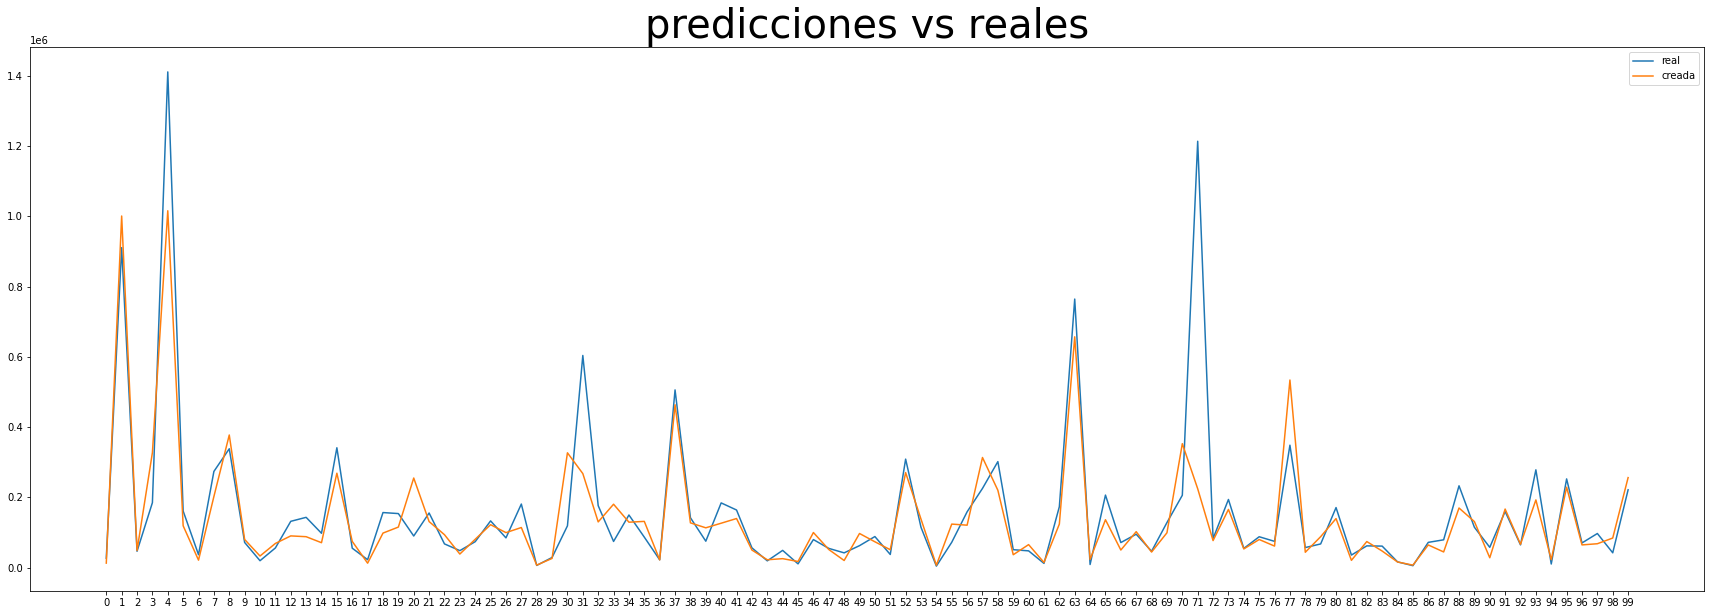

In [5]:
tabla2= pd.DataFrame()
tabla2['real']=tabla['real']
tabla2['creada']=tabla['Pruebaenvacia']

tabla2.iloc[0:100].plot(figsize=(30, 10))
plt.xticks(np.arange( 0, 100, 1))
plt.title('predicciones vs reales', size=40)
plt.show()

### 1º observación: Dispersión de los valores creados 

<AxesSubplot:>

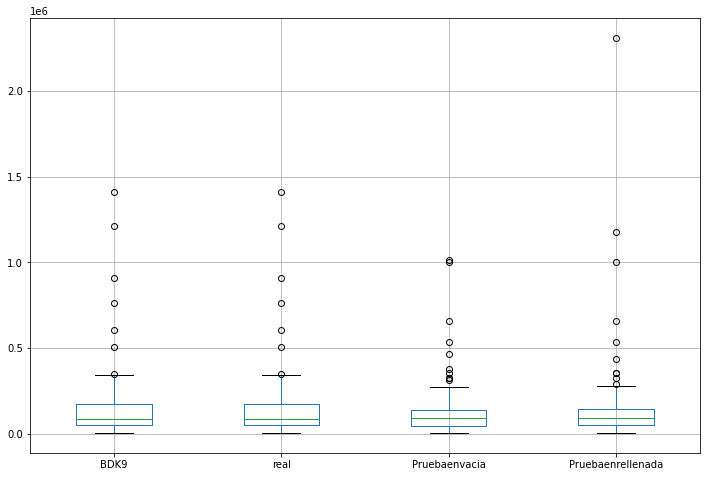

In [6]:
tabla.boxplot(return_type='axes', figsize=(12,8))

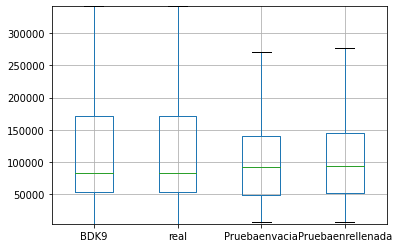

In [7]:
fig, ax = plt.subplots()
#Note showfliers=False is more readable, but requires a recent version iirc
box = tabla.iloc[0:100].boxplot(ax=ax, sym='') 
ax.margins(y=0)
plt.show()

In [8]:
tabla.count()

BDK9                 100
real                 100
Pruebaenvacia        100
Pruebaenrellenada    100
dtype: int64

### 2º observación: diferencias tanto por 1 de predicciones vs datos reales

In [9]:
tabla['dif']= (((tabla['Pruebaenvacia']*100/tabla['real'])-100).abs())/100
tabla['dif2']= (((tabla['Pruebaenrellenada']*100/tabla['real'])-100).abs())/100
tabla['DIF']= ((tabla['Pruebaenvacia']-tabla['real']) / tabla['real'].abs()).abs()
tabla['DIF2']= ((tabla['Pruebaenrellenada']-tabla['real']) / tabla['real'].abs()).abs()

In [10]:
tabla['comp']=tabla['dif']-tabla['DIF']
tabla['comp']=tabla['comp'].abs()

In [11]:
tabla.describe()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada,dif,dif2,DIF,DIF2,comp
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,1.560990e+05,1.560990e+05,1.389695e+05,1.615635e+05,0.344366,0.346462,0.344366,0.346462,5.674280e-17
std,2.208028e+05,2.208028e+05,1.690352e+05,2.791508e+05,0.344182,0.418769,0.344182,0.418769,5.663506e-17
min,4.488000e+03,4.488000e+03,7.074444e+03,7.231889e+03,0.006100,0.000537,0.006100,0.000537,0.000000e+00
25%,5.390225e+04,5.390225e+04,4.841875e+04,5.210228e+04,0.134486,0.123141,0.134486,0.123141,0.000000e+00
50%,8.380850e+04,8.380850e+04,9.212500e+04,9.477439e+04,0.260504,0.236485,0.260504,0.236485,5.551115e-17
75%,1.716970e+05,1.716970e+05,1.397772e+05,1.449734e+05,0.419498,0.363710,0.419498,0.363710,8.326673e-17
max,1.411207e+06,1.411207e+06,1.015980e+06,2.311556e+06,1.830673,2.719239,1.830673,2.719239,2.220446e-16


In [12]:
print ('Diferencia entre fórmulas')
print (sum(tabla['comp']))

Diferencia entre fórmulas
5.674280489920136e-15


### Tabla de diferencias 

In [13]:
dif= pd.DataFrame()
dif['DIF']=tabla['DIF']
dif['DIF2']=tabla['DIF2']

dif.describe()

,DIF,DIF2
count,100.000000,100.000000
mean,0.344366,0.346462
std,0.344182,0.418769
min,0.006100,0.000537
25%,0.134486,0.123141
50%,0.260504,0.236485
75%,0.419498,0.363710
max,1.830673,2.719239


# TesT Patrimonio Neto

In [14]:
bdk9=pd.read_csv('/users/Sergio/Documents/EntregasUVigo/BDrellenada.csv')
vacia=pd.read_csv('/users/Sergio/Documents/Python Docs/BaseD.csv')

# eliminamos las 6 empresas y reindexamos filas
vacia=vacia.drop([22,129,155,162,189,297])
vacia.index = range(len(vacia))

In [15]:
print ('Todos los datos eran reales y no imputados')
vacia['Patrimonioneto_mean'].isnull().sum()

Todos los datos eran reales y no imputados


0

In [16]:
tabla=pd.DataFrame()
tabla['BDK9']=bdk9['Patrimonioneto_mean']
tabla['real']=vacia['Patrimonioneto_mean']


#corrección de formato en BD real
tabla['real']=tabla['real'].astype(str)
tabla['real']=tabla['real'].str.replace(",","")
tabla['real']=tabla['real'].astype(float)

# importamos pruebas
prueba=pd.read_csv('/users/Sergio/Documents/patri100.csv')
prueba2=pd.read_csv('/users/Sergio/Documents/patri2_100.csv')

#añadimos columnas de pruebas
tabla['Pruebaenvacia']= prueba['Patrimonioneto_mean']
tabla['Pruebaenrellenada']=prueba2['Patrimonioneto_mean']

#acortamos la tabla a 100 empresas ( se imputaron las 100 primeras en las pruebas)
tabla=tabla.iloc[0:100]




tabla.head()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada
0,-25124.0,-25124.0,-1.885789e+04,-1.501600e+04
1,3627447.0,3627447.0,9.513706e+05,1.002994e+06
2,8881.0,8881.0,2.398478e+04,2.398478e+04
3,603244.0,603244.0,3.340087e+05,3.872337e+05
4,3955462.0,3955462.0,1.001818e+06,1.001818e+06


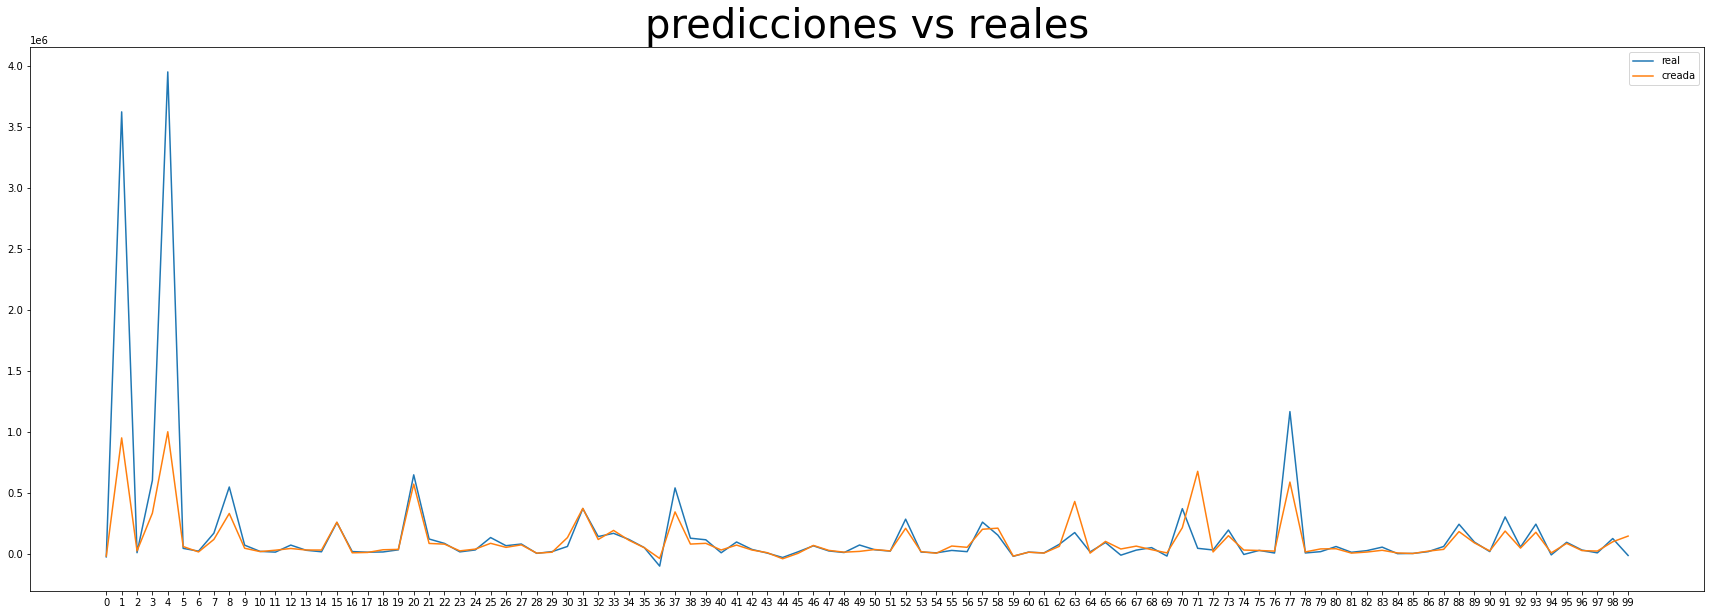

In [17]:
tabla2= pd.DataFrame()
tabla2['real']=tabla['real']
tabla2['creada']=tabla['Pruebaenvacia']

tabla2.iloc[0:100].plot(figsize=(30, 10))
plt.xticks(np.arange( 0, 100, 1))
plt.title('predicciones vs reales', size=40)
plt.show()

### Primera observación: dispersión de los datos creados

<AxesSubplot:>

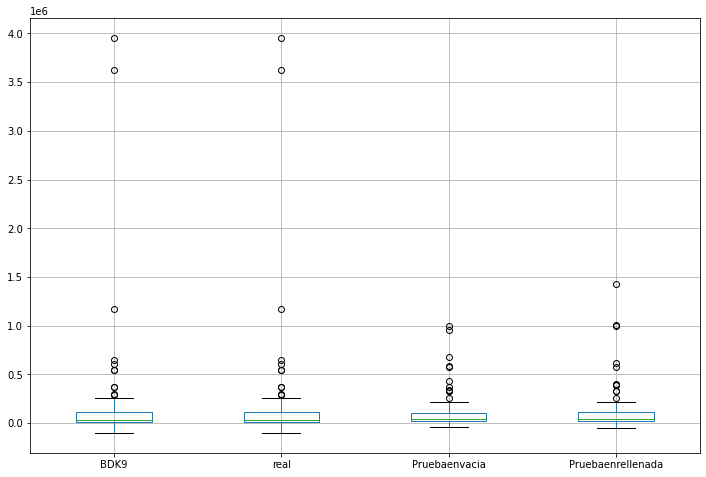

In [18]:
tabla.boxplot(return_type='axes', figsize=(12,8))

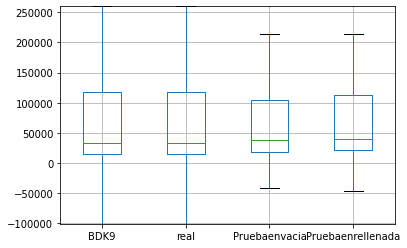

In [19]:
fig, ax = plt.subplots()
#Note showfliers=False is more readable, but requires a recent version iirc
box = tabla.iloc[0:100].boxplot(ax=ax, sym='') 
ax.margins(y=0)
plt.show()

### 2º observación: diferencias tanto por 1 de predicciones vs datos reales

In [20]:
tabla['dif']= (((tabla['Pruebaenvacia']*100/tabla['real'])-100).abs())/100
tabla['dif2']= (((tabla['Pruebaenrellenada']*100/tabla['real'])-100).abs())/100
tabla['DIF']= ((tabla['Pruebaenvacia']-tabla['real']) / tabla['real'].abs()).abs()
tabla['DIF2']= ((tabla['Pruebaenrellenada']-tabla['real']) / tabla['real'].abs()).abs()

In [21]:
tabla['comp']=tabla['dif']-tabla['DIF']
tabla['comp']=tabla['comp'].abs()

In [22]:
print('Diferencia entre fórmulas')
print (sum(tabla['comp']))

Diferencia entre fórmulas
8.277233065623335e-15


In [23]:
tabla.describe()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada,dif,dif2,DIF,DIF2,comp
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,1.712629e+05,1.712629e+05,1.065852e+05,1.168463e+05,0.893276,1.124399,0.893276,1.124399,8.277233e-17
std,5.477623e+05,5.477623e+05,1.795810e+05,2.186537e+05,1.997860,3.453168,1.997860,3.453168,1.911736e-16
min,-1.009980e+05,-1.009980e+05,-4.091122e+04,-4.671133e+04,0.005169,0.000950,0.005169,0.000950,0.000000e+00
25%,1.416125e+04,1.416125e+04,1.799347e+04,2.143839e+04,0.167088,0.200839,0.167088,0.200839,0.000000e+00
50%,3.270100e+04,3.270100e+04,3.883128e+04,3.955744e+04,0.336390,0.384959,0.336390,0.384959,5.551115e-17
75%,1.185212e+05,1.185212e+05,1.038335e+05,1.121133e+05,0.665439,0.693990,0.665439,0.693990,8.326673e-17
max,3.955462e+06,3.955462e+06,1.001818e+06,1.429620e+06,14.098222,30.879853,14.098222,30.879853,1.776357e-15


### Tabla de diferencias

In [24]:
dif= pd.DataFrame()
dif['DIF']=tabla['DIF']
dif['DIF2']=tabla['DIF2']

dif.describe()

,DIF,DIF2
count,100.000000,100.000000
mean,0.893276,1.124399
std,1.997860,3.453168
min,0.005169,0.000950
25%,0.167088,0.200839
50%,0.336390,0.384959
75%,0.665439,0.693990
max,14.098222,30.879853


# Test efectivo

In [25]:
bdk9=pd.read_csv('/users/Sergio/Documents/EntregasUVigo/BDrellenada.csv')
vacia=pd.read_csv('/users/Sergio/Documents/Python Docs/BaseD.csv')

# eliminamos las 6 empresas y reindexamos filas
vacia=vacia.drop([22,129,155,162,189,297])
vacia.index = range(len(vacia))

In [26]:
print ('Tiene 8 datos imputados, no sabemos si en los 100 primeros')
vacia['Efectivo_mean'].isnull().sum()

Tiene 8 datos imputados, no sabemos si en los 100 primeros


8

In [27]:
tabla=pd.DataFrame()
tabla['BDK9']=bdk9['Efectivo_mean']
tabla['real']=vacia['Efectivo_mean']


#corrección de formato en BD real
tabla['real']=tabla['real'].astype(str)
tabla['real']=tabla['real'].str.replace(",","")
tabla['real']=tabla['real'].astype(float)

# importamos pruebas
prueba=pd.read_csv('/users/Sergio/Documents/EF100.csv')
prueba2=pd.read_csv('/users/Sergio/Documents/EF_2_100.csv')

#añadimos columnas de pruebas
tabla['Pruebaenvacia']= prueba['Efectivo_mean']
tabla['Pruebaenrellenada']=prueba2['Efectivo_mean']

#acortamos la tabla a 101 empresas ( se imputaron las 101 primeras en las pruebas)
tabla=tabla.iloc[0:100]




tabla.head()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada
0,11298.0,11298.0,6070.333333,8720.222222
1,222677.0,222677.0,201295.444444,201295.444444
2,27804.0,27804.0,13498.888889,13498.888889
3,23994.0,23994.0,83256.000000,82280.160494
4,1375723.0,1375723.0,186278.111111,145946.111111


In [28]:
tabla=tabla.dropna()
tabla.index = range(len(tabla))

In [29]:
print ('Tenía 4 datos imputados en los 100 primeros, quitamos esas filas')
tabla.count()

Tenía 4 datos imputados en los 100 primeros, quitamos esas filas


BDK9                 96
real                 96
Pruebaenvacia        96
Pruebaenrellenada    96
dtype: int64

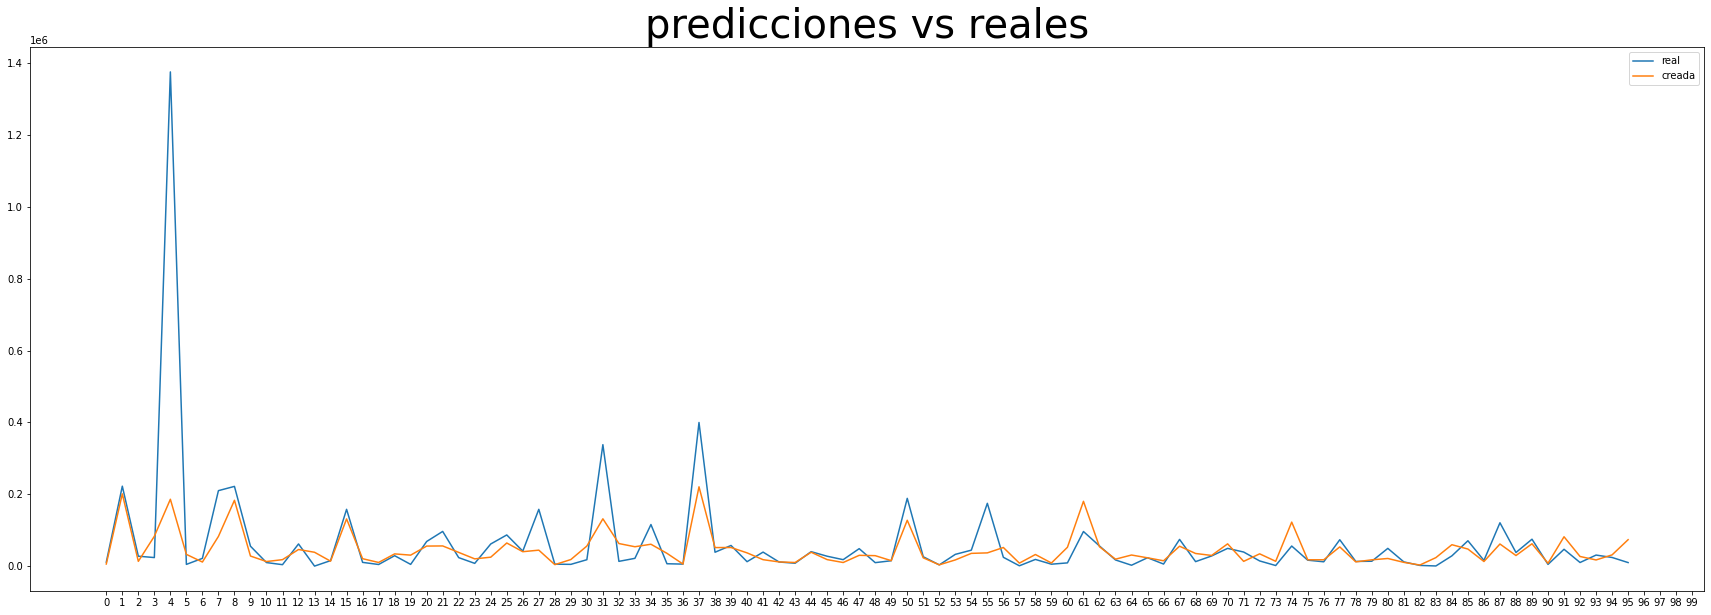

In [30]:
tabla2= pd.DataFrame()
tabla2['real']=tabla['real']
tabla2['creada']=tabla['Pruebaenvacia']

tabla2.iloc[0:100].plot(figsize=(30, 10))
plt.xticks(np.arange( 0, 100, 1))
plt.title('predicciones vs reales', size=40)
plt.show()

### Primera observación: dispersión de los datos creados

In [31]:
tabla.describe()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada
count,9.600000e+01,9.600000e+01,96.000000,96.000000
mean,6.210105e+04,6.210105e+04,44686.537037,46421.209105
std,1.519628e+05,1.519628e+05,44822.651207,46353.924803
min,2.630000e+02,2.630000e+02,3220.222222,2977.000000
25%,1.019650e+04,1.019650e+04,17402.972222,17998.833333
50%,2.389550e+04,2.389550e+04,31280.722222,32175.055556
75%,5.612175e+04,5.612175e+04,54504.027778,55718.472222
max,1.375723e+06,1.375723e+06,220966.444444,254282.444444


<AxesSubplot:>

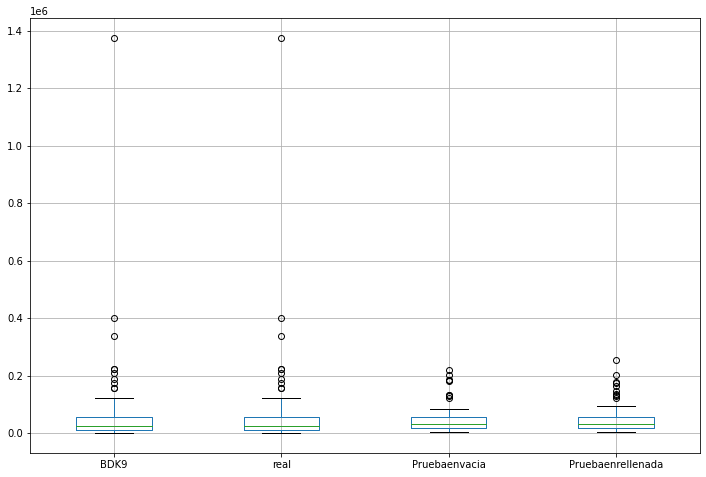

In [32]:
tabla.boxplot(return_type='axes', figsize=(12,8))

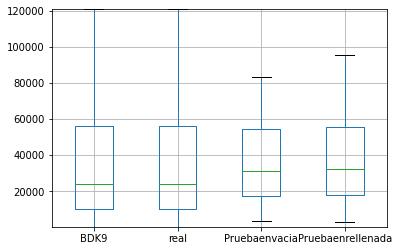

In [33]:
fig, ax = plt.subplots()
#Note showfliers=False is more readable, but requires a recent version iirc
box = tabla.iloc[0:100].boxplot(ax=ax, sym='') 
ax.margins(y=0)
plt.show()

### 2º observación: diferencias tanto por 1 de predicciones vs datos reales

In [34]:
tabla['dif']= (((tabla['Pruebaenvacia']*100/tabla['real'])-100).abs())/100
tabla['dif2']= (((tabla['Pruebaenrellenada']*100/tabla['real'])-100).abs())/100
tabla['DIF']= ((tabla['Pruebaenvacia']-tabla['real']) / tabla['real'].abs()).abs()
tabla['DIF2']= ((tabla['Pruebaenrellenada']-tabla['real']) / tabla['real'].abs()).abs()

In [35]:
tabla['comp']=tabla['dif']-tabla['DIF']
tabla['comp']=tabla['comp'].abs()

In [36]:
print('Diferencia entre fórmulas')
print (sum(tabla['comp']))

Diferencia entre fórmulas
3.658184866139891e-14


In [37]:
tabla.head()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada,dif,dif2,DIF,DIF2,comp
0,11298.0,11298.0,6070.333333,8720.222222,0.462707,0.228162,0.462707,0.228162,0.000000e+00
1,222677.0,222677.0,201295.444444,201295.444444,0.096020,0.096020,0.096020,0.096020,5.551115e-17
2,27804.0,27804.0,13498.888889,13498.888889,0.514498,0.514498,0.514498,0.514498,0.000000e+00
3,23994.0,23994.0,83256.000000,82280.160494,2.469867,2.429197,2.469867,2.429197,0.000000e+00
4,1375723.0,1375723.0,186278.111111,145946.111111,0.864596,0.893913,0.864596,0.893913,1.110223e-16


### Tabla de diferencias

In [38]:
dif= pd.DataFrame()
dif['DIF']=tabla['DIF']
dif['DIF2']=tabla['DIF2']

dif.describe()

,DIF,DIF2
count,96.000000,96.000000
mean,3.017920,3.291818
std,15.337970,15.985912
min,0.010123,0.010123
25%,0.216205,0.220190
50%,0.471780,0.474754
75%,1.192721,1.127395
max,146.294888,151.313477


# TEST EN VA_MEAN

In [39]:
bdk9=pd.read_csv('/users/Sergio/Documents/EntregasUVigo/BDrellenada.csv')
vacia=pd.read_csv('/users/Sergio/Documents/Python Docs/BaseD.csv')

# eliminamos las 6 empresas y reindexamos filas
vacia=vacia.drop([22,129,155,162,189,297])
vacia.index = range(len(vacia))

In [40]:
print ('Tiene 3 datos imputados, no sabemos si en los 100 primeros')
vacia['VA_mean'].isnull().sum()

Tiene 3 datos imputados, no sabemos si en los 100 primeros


3

In [41]:
tabla=pd.DataFrame()
tabla['BDK9']=bdk9['VA_mean']
tabla['real']=vacia['VA_mean']


#corrección de formato en BD real
tabla['real']=tabla['real'].astype(str)
tabla['real']=tabla['real'].str.replace(",","")
tabla['real']=tabla['real'].astype(float)

# importamos pruebas
prueba=pd.read_csv('/users/Sergio/Documents/VA100.csv')
prueba2=pd.read_csv('/users/Sergio/Documents/VA_2_100.csv')

#añadimos columnas de pruebas
tabla['Pruebaenvacia']= prueba['VA_mean']
tabla['Pruebaenrellenada']=prueba2['VA_mean']

#acortamos la tabla a 101 empresas ( se imputaron las 101 primeras en las pruebas)
tabla=tabla.iloc[0:100]




tabla.head()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada
0,8911.0,8911.0,6829.555556,5116.666667
1,390742.0,390742.0,604402.111111,831107.222222
2,41609.0,41609.0,28685.000000,33112.222222
3,572383.0,572383.0,205529.888889,186883.888889
4,270252.0,270252.0,796971.777778,828742.777778


In [42]:
tabla=tabla.dropna()
tabla.index = range(len(tabla))

In [43]:
print ('Tenía 2 datos imputados en los 100 primeros, quitamos esas filas')
tabla.count()

Tenía 2 datos imputados en los 100 primeros, quitamos esas filas


BDK9                 98
real                 98
Pruebaenvacia        98
Pruebaenrellenada    98
dtype: int64

In [44]:
tabla.describe()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada
count,9.800000e+01,9.800000e+01,98.000000,98.000000
mean,1.725239e+05,1.725239e+05,98027.111111,108120.783447
std,5.538856e+05,5.538856e+05,118567.366693,140132.056530
min,-2.903800e+04,-2.903800e+04,1162.666667,1559.444444
25%,3.389325e+04,3.389325e+04,33085.555556,34771.916667
50%,8.847050e+04,8.847050e+04,74780.222222,77642.333333
75%,1.638352e+05,1.638352e+05,125175.972222,129601.194444
max,5.463479e+06,5.463479e+06,796971.777778,831107.222222


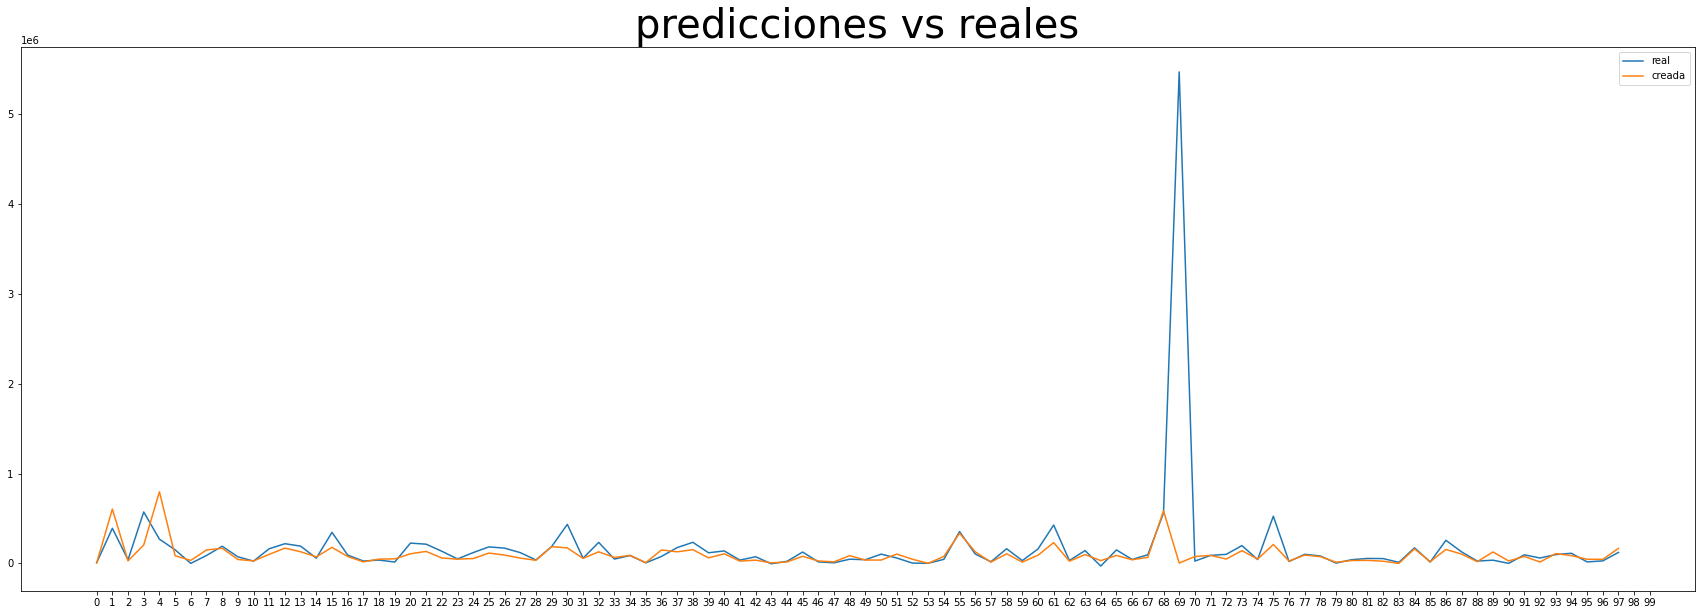

In [45]:
tabla2= pd.DataFrame()
tabla2['real']=tabla['real']
tabla2['creada']=tabla['Pruebaenvacia']

tabla2.iloc[0:100].plot(figsize=(30, 10))
plt.xticks(np.arange( 0, 100, 1))
plt.title('predicciones vs reales', size=40)
plt.show()

### Primera observación: dispersión de los datos creados

<AxesSubplot:>

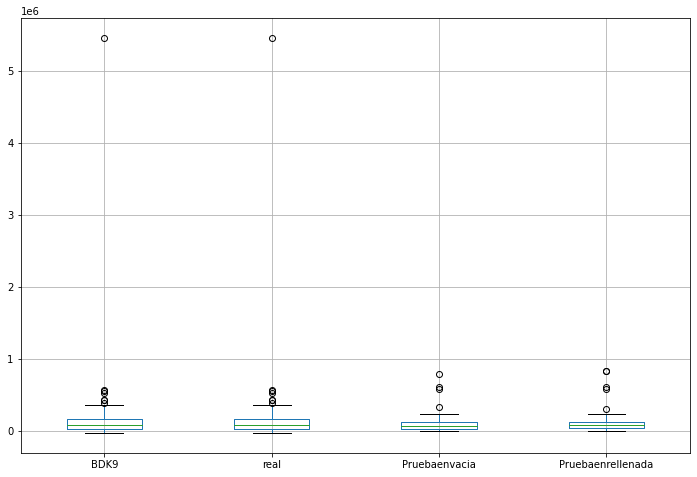

In [46]:
tabla.boxplot(return_type='axes', figsize=(12,8))

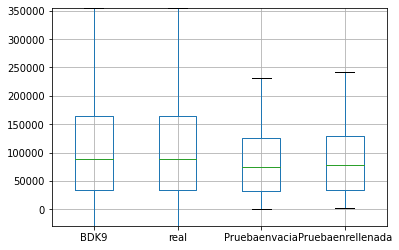

In [47]:
fig, ax = plt.subplots()
#Note showfliers=False is more readable, but requires a recent version iirc
box = tabla.iloc[0:100].boxplot(ax=ax, sym='') 
ax.margins(y=0)
plt.show()

### 2º observación: diferencias tanto por 1 de predicciones vs datos reales

In [48]:
tabla['dif']= (((tabla['Pruebaenvacia']*100/tabla['real'])-100).abs())/100
tabla['dif2']= (((tabla['Pruebaenrellenada']*100/tabla['real'])-100).abs())/100
tabla['DIF']= ((tabla['Pruebaenvacia']-tabla['real']) / tabla['real'].abs()).abs()
tabla['DIF2']= ((tabla['Pruebaenrellenada']-tabla['real']) / tabla['real'].abs()).abs()

In [49]:
tabla['comp']=tabla['dif']-tabla['DIF']
tabla['comp']=tabla['comp'].abs()

In [50]:
print('Diferencia entre fórmulas')
print (sum(tabla['comp']))

Diferencia entre fórmulas
8.667979528587111e-15


In [51]:
tabla.describe()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada,dif,dif2,DIF,DIF2,comp
count,9.800000e+01,9.800000e+01,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,9.800000e+01
mean,1.725239e+05,1.725239e+05,98027.111111,108120.783447,1.066292,1.101451,1.066292,1.101451,8.844877e-17
std,5.538856e+05,5.538856e+05,118567.366693,140132.056530,3.319046,3.350481,3.319046,3.350481,3.635629e-16
min,-2.903800e+04,-2.903800e+04,1162.666667,1559.444444,0.002308,0.002308,0.002308,0.002308,0.000000e+00
25%,3.389325e+04,3.389325e+04,33085.555556,34771.916667,0.224391,0.214248,0.224391,0.214248,0.000000e+00
50%,8.847050e+04,8.847050e+04,74780.222222,77642.333333,0.371574,0.359156,0.371574,0.359156,2.775558e-17
75%,1.638352e+05,1.638352e+05,125175.972222,129601.194444,0.593875,0.565913,0.593875,0.565913,6.591949e-17
max,5.463479e+06,5.463479e+06,796971.777778,831107.222222,24.025318,22.139830,24.025318,22.139830,3.552714e-15


### Tabla de diferencias

In [52]:
dif= pd.DataFrame()
dif['DIF']=tabla['DIF']
dif['DIF2']=tabla['DIF2']

dif.describe()

,DIF,DIF2
count,98.000000,98.000000
mean,1.066292,1.101451
std,3.319046,3.350481
min,0.002308,0.002308
25%,0.224391,0.214248
50%,0.371574,0.359156
75%,0.593875,0.565913
max,24.025318,22.139830


# TEST EN LIQUIDEZ

In [53]:
bdk9=pd.read_csv('/users/Sergio/Documents/EntregasUVigo/BDrellenada.csv')
vacia=pd.read_csv('/users/Sergio/Documents/Python Docs/BaseD.csv')

# eliminamos las 6 empresas y reindexamos filas
vacia=vacia.drop([22,129,155,162,189,297])
vacia.index = range(len(vacia))



### Aquí no podemos coger los ratios de la BD inicial porque estaban mal, se recalculan con datos reales

In [54]:
vacia["Activocorriente_mean"]= vacia["Activocorriente_mean"].str.replace(',','')
vacia["Pasivocorriente_mean"]= vacia["Pasivocorriente_mean"].str.replace(',','')

vacia["Activocorriente_mean"]= vacia["Activocorriente_mean"].astype(float)
vacia["Pasivocorriente_mean"]= vacia["Pasivocorriente_mean"].astype(float)

vacia['liquidez_mean']=vacia["Activocorriente_mean"]/vacia["Pasivocorriente_mean"]

In [55]:
vacia['liquidez_mean'].dtypes

dtype('float64')

In [56]:
print ('Tiene 3 datos imputados, no sabemos si en los 100 primeros')
vacia['liquidez_mean'].isnull().sum()

Tiene 3 datos imputados, no sabemos si en los 100 primeros


3

In [57]:
tabla=pd.DataFrame()
tabla['BDK9']=bdk9['liquidez_mean']
tabla['real']=vacia['liquidez_mean']


#corrección de formato en BD real
tabla['real']=tabla['real'].astype(str)
tabla['real']=tabla['real'].str.replace(",","")
tabla['real']=tabla['real'].astype(float)

# importamos pruebas
prueba=pd.read_csv('/users/Sergio/Documents/ratio100.csv')
prueba2=pd.read_csv('/users/Sergio/Documents/ratio_100.csv')

#añadimos columnas de pruebas
tabla['Pruebaenvacia']= prueba['liquidez_mean']
tabla['Pruebaenrellenada']=prueba2['liquidez_mean']

#acortamos la tabla a 101 empresas ( se imputaron las 101 primeras en las pruebas)
tabla=tabla.iloc[0:100]




tabla.head()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada
0,0.517774,0.517774,0.302881,0.358526
1,1.141750,1.141750,2.004591,2.004591
2,1.080975,1.080975,2.199580,2.199580
3,0.918638,0.918638,2.024605,1.918766
4,25.582028,25.582028,2.081654,2.110237


In [58]:
tabla=tabla.dropna()
tabla.index = range(len(tabla))

In [59]:
print('los 3 vacíos no estaban en los 100 primeros, por lo que coinciden los 100 con BD rellenada')
tabla.count()

los 3 vacíos no estaban en los 100 primeros, por lo que coinciden los 100 con BD rellenada


BDK9                 100
real                 100
Pruebaenvacia        100
Pruebaenrellenada    100
dtype: int64

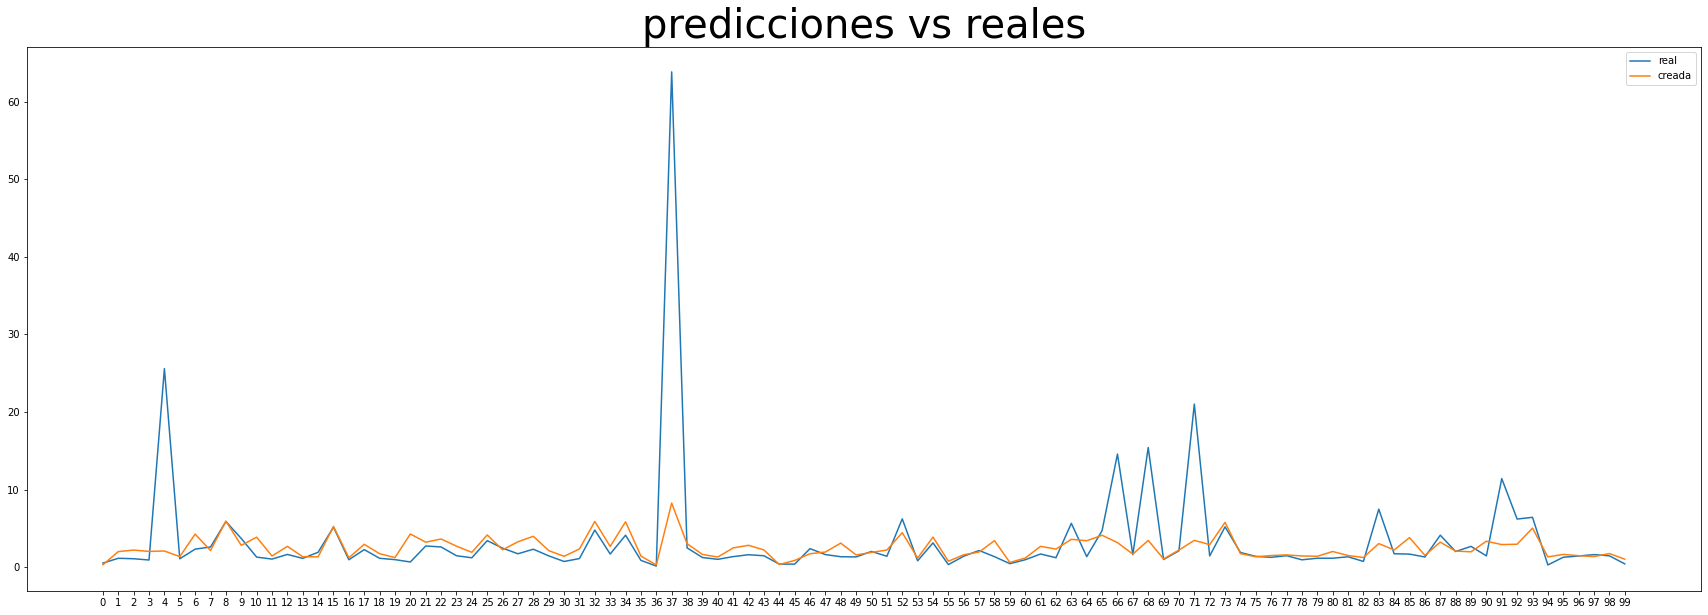

In [60]:
tabla2= pd.DataFrame()
tabla2['real']=tabla['real']
tabla2['creada']=tabla['Pruebaenvacia']

tabla2.iloc[0:100].plot(figsize=(30, 10))
plt.xticks(np.arange( 0, 100, 1))
plt.title('predicciones vs reales', size=40)
plt.show()

### Primera observación: dispersión de los datos creados

<AxesSubplot:>

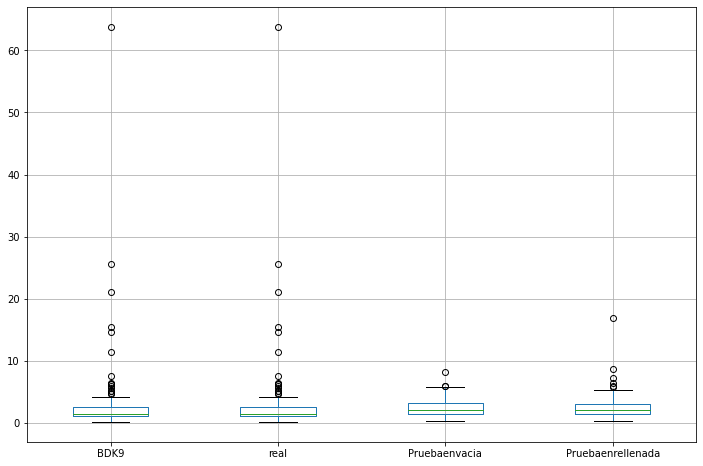

In [61]:
tabla.boxplot(return_type='axes', figsize=(12,8))

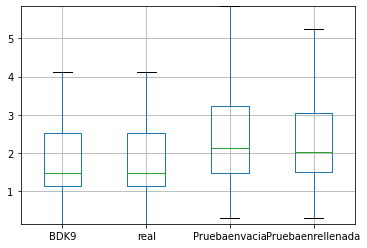

In [62]:
fig, ax = plt.subplots()
#Note showfliers=False is more readable, but requires a recent version iirc
box = tabla.iloc[0:100].boxplot(ax=ax, sym='') 
ax.margins(y=0)
plt.show()

### 2º observación: diferencias tanto por 1 de predicciones vs datos reales

In [63]:
tabla['dif']= (((tabla['Pruebaenvacia']*100/tabla['real'])-100).abs())/100
tabla['dif2']= (((tabla['Pruebaenrellenada']*100/tabla['real'])-100).abs())/100
tabla['DIF']= ((tabla['Pruebaenvacia']-tabla['real']) / tabla['real'].abs()).abs()
tabla['DIF2']= ((tabla['Pruebaenrellenada']-tabla['real']) / tabla['real'].abs()).abs()

In [64]:
tabla['comp']=tabla['dif']-tabla['DIF']
tabla['comp']=tabla['comp'].abs()

In [65]:
print('Diferencia entre fórmulas')
print (sum(tabla['comp']))

Diferencia entre fórmulas
6.777564620641385e-15


In [66]:
tabla.describe()

,BDK9,real,Pruebaenvacia,Pruebaenrellenada,dif,dif2,DIF,DIF2,comp
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,3.375627,3.375627,2.479099,2.557403,0.591462,0.604593,0.591462,0.604593,6.777565e-17
std,7.245222,7.245222,1.391815,2.038031,0.718397,0.834844,0.718397,0.834844,8.335548e-17
min,0.134848,0.134848,0.277429,0.277429,0.008706,0.009583,0.008706,0.009583,0.000000e+00
25%,1.135728,1.135728,1.465157,1.487160,0.195960,0.166882,0.195960,0.166882,0.000000e+00
50%,1.464432,1.464432,2.136159,2.010108,0.375181,0.380617,0.375181,0.380617,5.551115e-17
75%,2.513820,2.513820,3.217252,3.051327,0.794216,0.744049,0.794216,0.744049,1.110223e-16
max,63.814478,63.814478,8.253675,16.859275,5.446921,5.446921,5.446921,5.446921,4.440892e-16


### Tabla de diferencias

In [67]:
dif= pd.DataFrame()
dif['DIF']=tabla['DIF']
dif['DIF2']=tabla['DIF2']

dif.describe()

,DIF,DIF2
count,100.000000,100.000000
mean,0.591462,0.604593
std,0.718397,0.834844
min,0.008706,0.009583
25%,0.195960,0.166882
50%,0.375181,0.380617
75%,0.794216,0.744049
max,5.446921,5.446921


## Resumen

In [68]:
resumen=pd.DataFrame()

In [69]:
resumen = {'Variable':['AC', 'Patrimonio Neto', 'Efectivo', 'VA', 'Liquidez'],
        'Mediana Real':[1.560990e+05, 1.712629e+05, 6.210105e+04, 0.546806, 0.591462],
       'Mediana Creada':[1.560990e+05, 1.712629e+05, 6.210105e+04, 1.725239e+05, 3.375627]}

In [71]:
jupyter nbconvert --to pdf --TemplateExporter.exclude_input=True  my_notebook.ipynb

SyntaxError: invalid syntax (3396215814.py, line 1)